## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
a = []
while(1):
    a.append('1')

In [4]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
#importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 
import warnings
from zipfile import ZipFile
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
warnings.filterwarnings('ignore')

Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = r"/gdrive/My Drive/Datasets/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
with ZipFile(project_path+"DogBreed_Classification/train.zip", 'r') as z:
  z.extractall(project_path)

Repeat the same step for test.zip

In [0]:
with ZipFile(project_path+"DogBreed_Classification/test.zip", 'r') as z:
  z.extractall(project_path)

Repeat the same step for sample_submission.csv.zip

In [0]:
with ZipFile(project_path+"DogBreed_Classification/sample_submission.csv.zip", 'r') as z:
  z.extractall(project_path)

Repeat the same step for labels.csv.zip

In [0]:
with ZipFile(project_path+"DogBreed_Classification/labels.csv.zip", 'r') as z:
  z.extractall(project_path)

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
labels = pd.read_csv(project_path+'labels.csv')

In [36]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [37]:
labels.breed.value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

### Get one-hot encodings of labels

In [0]:
onehotLabels = pd.get_dummies(labels.breed)
onehotLabels.index = labels.id

In [39]:
onehotLabels.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,english_foxhound,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000bec180eb18c7604dcecc8fe0dba07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
001513dfcb2ffafc82cccf4d8bbaba97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
001cdf01b096e06d78e9e5112d419397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
00214f311d5d2247d5dfe4fe24b2303d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0021f9ceb3235effd7fcde7f7538ed62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [40]:
x_train = []
y_train = []
img_rows =128
img_cols = 128
train_path = project_path+'train/'

for id in tqdm(onehotLabels.index):
  img = cv2.imread(train_path + id +'.jpg')
  img = cv2.resize(img,(img_rows,img_cols),interpolation = cv2.INTER_AREA)
  x_train.append(img)
  y_train.append(onehotLabels.loc[id].values)
x_train = np.array(x_train)
y_train = np.array(y_train)
print('Shape of x_train is : ',x_train.shape)
print('shape of y_train is :',y_train.shape)

100%|██████████| 10222/10222 [01:41<00:00, 100.66it/s]


Shape of x_train is :  (10222, 128, 128, 3)
shape of y_train is : (10222, 120)


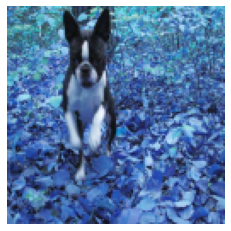

Label :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [41]:
#sample image and its label

plt.imshow(x_train[0])
plt.axis('off')
plt.show()
print('Label : ',y_train[0])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [42]:
x_train = x_train/255
x_train = x_train.reshape(-1,128,128,3) #To reshape the pictures 
print('Shape of x_train : ',x_train.shape)

Shape of x_train :  (10222, 128, 128, 3)


### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [43]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 10) 
print('Shape of training set :',x_train.shape,y_train.shape)
print('Shape of validation set :',x_val.shape,y_val.shape)

Shape of training set : (9199, 128, 128, 3) (9199, 120)
Shape of validation set : (1023, 128, 128, 3) (1023, 120)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [44]:
sample_submission = pd.read_csv(project_path + 'sample_submission.csv')
test_img = sample_submission.id
test_img.head()

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
2    0012a730dfa437f5f3613fb75efcd4ce
3    001510bc8570bbeee98c8d80c8a95ec1
4    001a5f3114548acdefa3d4da05474c2e
Name: id, dtype: object

Run the below code to load the test image files in x_test_feature

In [45]:
test_path1 = project_path+'test/'
x_test_features = []
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread(test_path1+f+'.jpg')
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_features.append(img_resize)
x_test = np.array(x_test_features)
print('Shape of x_test :',x_test.shape)

100%|██████████| 10357/10357 [01:27<00:00, 118.56it/s]


Shape of x_test : (10357, 128, 128, 3)


Normalize the test data and convert it into 4 dimensions

In [46]:
x_test = x_test/255       
x_test = x_test.reshape(-1,128,128,3)           ##Similary reshape test images as well
print('Shape of test set :',x_test.shape)

Shape of test set : (10357, 128, 128, 3)


### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [47]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (5, 5), activation = 'relu', input_shape = (128,128,3)))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.5))
cnn_model.add(Conv2D(64, (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation = 'relu'))
cnn_model.add(Dense(120, activation = 'softmax'))
print('CNN model summary')
cnn_model.summary()

CNN model summary
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 25

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
#Compiling the Model
cnn_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

In [49]:
#training the model
batch_size = 128
epochs = 10
cnn_model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/10
72/72 - 3s - loss: 5.2042 - acc: 0.0082 - val_loss: 4.7861 - val_acc: 0.0059
Epoch 2/10
72/72 - 3s - loss: 4.7855 - acc: 0.0114 - val_loss: 4.7847 - val_acc: 0.0059
Epoch 3/10
72/72 - 3s - loss: 4.7833 - acc: 0.0127 - val_loss: 4.7835 - val_acc: 0.0166
Epoch 4/10
72/72 - 3s - loss: 4.7441 - acc: 0.0175 - val_loss: 4.7217 - val_acc: 0.0147
Epoch 5/10
72/72 - 3s - loss: 4.5598 - acc: 0.0282 - val_loss: 4.5333 - val_acc: 0.0342
Epoch 6/10
72/72 - 3s - loss: 4.4092 - acc: 0.0433 - val_loss: 4.4439 - val_acc: 0.0371
Epoch 7/10
72/72 - 3s - loss: 4.3253 - acc: 0.0526 - val_loss: 4.4349 - val_acc: 0.0450
Epoch 8/10
72/72 - 3s - loss: 4.2478 - acc: 0.0631 - val_loss: 4.3748 - val_acc: 0.0371
Epoch 9/10
72/72 - 3s - loss: 4.1131 - acc: 0.0811 - val_loss: 4.3614 - val_acc: 0.0499
Epoch 10/10
72/72 - 3s - loss: 3.9123 - acc: 0.1124 - val_loss: 4.3822 - val_acc: 0.0538


#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
#  Data Augmentation - Changing pics to improve the accuarcy
train_datagen = ImageDataGenerator(
	rotation_range=30,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [0]:
validation_datagen = ImageDataGenerator(
	rotation_range=30,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

### Using the above objects, create the image generators with variable names `train_generator` and `validation_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = train_datagen.flow(x_train,y_train,batch_size=batch_size)
validation_generator = validation_datagen.flow(x_val,y_val,batch_size=batch_size)

### Fit the model using fit_generator() using `train_generator` and `validation_generator` from the above step with 10 epochs

In [0]:
H = cnn_model.fit_generator(
	train_generator,
	validation_data = validation_generator,
	steps_per_epoch=len(x_train) // batch_size,
	epochs=epochs,verbose=2)

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'DogBreed_Classification/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg',input_shape=(128,128,3))

Print the summary of the base_model

In [0]:
base_model.summary()

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(120,activation='softmax'))

print(model.summary())

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
for layer in base_model.layers:
  layer.trainable = False

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
base_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
base_model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = (x_val, y_val), verbose = 2)